In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.dates as mdates
from datetime import datetime
import datetime as dt

### US State Influenza Analysis ###

D:\Programs\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


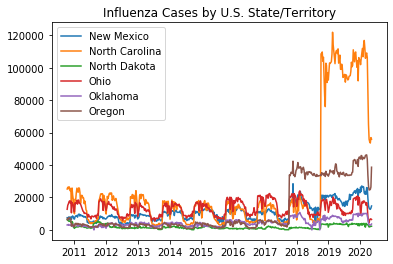

In [15]:
# prepare data
state_flu_data = pd.read_csv('2010-2020ILINet.csv', skiprows=[0])

dates = state_flu_data.YEAR.astype(str) + '-' + state_flu_data.WEEK.astype(str) + '-0'
state_flu_data.index = pd.to_datetime(dates, format = '%Y-%W-%w')
state_flu_data.index.name = 'date'

state_flu_data = state_flu_data[state_flu_data['TOTAL PATIENTS'] != 'X']
state_flu_data['cases'] = state_flu_data['TOTAL PATIENTS'].astype(int)

state_flu_data = state_flu_data.drop(['REGION TYPE', 'YEAR', 'WEEK', '% WEIGHTED ILI',
       '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65', 'ILITOTAL', 'NUM. OF PROVIDERS', 'TOTAL PATIENTS'], axis=1)

new_york_state = state_flu_data[state_flu_data.REGION == 'New York']
new_york_city = state_flu_data[state_flu_data.REGION == 'New York City'].replace('New York City', '')
all_new_york = new_york_state + new_york_city

state_flu_data = state_flu_data[(state_flu_data.REGION != 'New York') & (state_flu_data.REGION != 'New York City')]
state_flu_data = pd.concat([state_flu_data, all_new_york])

In [120]:
def sine(x, A, f, p, b):
    return A * np.sin(f * x + p) + b

In [ ]:
from scipy.optimize import curve_fit

test = state_flu_data[state_flu_data['REGION'] == 'Ohio']
def sine_regression(array):
    case_range = array.max() - array.min()
    case_mean = array.mean()
    p0 = [case_range / 2, 2*3.14/52, 0, case_mean]
    popt, pcov = curve_fit(sine, np.linspace(0, array.size, array.size), array, p0)
    return sine(array, *popt)

def plot_error(data):
    for state in data.REGION.unique():
        state_data = data[data.REGION == state]
        error = state_data.cases - sine_regression(state_data.cases)
        plt.plot(state_data.index, error / np.abs(error).max())

    plt.title('Influenza Normalized Error of Sine Regression Early 2020')
    plt.xlabel('Date')
    plt.ylabel('Normalized Errorof Cases')
    plt.fill_between([dt.datetime(2020, 3, 19), dt.datetime(2020, 4, 7)], 1, -1, color='blue', alpha=0.3)
    plt.xlim(dt.datetime(2020, 1, 5), dt.datetime(2020, 5, 10))
    plt.xticks(rotation = 45)
    plt.show()

    for state in data.REGION.unique():
        state_data = data[data.REGION == state]
        error = state_data.cases - sine_regression(state_data.cases)
        plt.plot(state_data.index, error / np.abs(error).max())

    plt.title('Influenza Normalized Error of Sine Regression Early 2019')
    plt.xlabel('Date')
    plt.ylabel('Normalized Error of Cases')
    plt.xlim(dt.datetime(2019, 1, 5), dt.datetime(2019, 5, 10))
    plt.xticks(rotation = 45)
    plt.show()

plot_error(state_flu_data)